## Pandas Mini Project with Stock Data

This Mini Project provides the idea on how to load data into Pandas Dataframe. Here, I worked on three stock datasets from Google, Apple and Amazon. I load these three stock data from .csv files. 

In [154]:
# importing pandas into Python
import pandas as pd
from datetime import datetime

# reading stock data file into a data frame and see what it looks like
Google_data = pd.read_csv('./GOOG.csv')

# displaying the first 5 rows of the DataFrame
Google_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


After looking at data, it is observed that all row in automatically labeled. 
Now, I load data from three different .csv files to get data for Google, Apple, and Amazon into separte DataFrames. For each stock data, I will load `Date` and `Adj Close` columns into the Dataframe. Another thing, I want `Date` column as a row index. I want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings, therefore, I needed to utilize `parse_dates` keyword as follows.

In [155]:
#loading three stock datasets and selecting appropriate columns
Google_data = pd.read_csv('./GOOG.csv',index_col = ['Date'],parse_dates = True,usecols = ['Date','Adj Close'])
Apple_data = pd.read_csv('./AAPL.csv',index_col = ['Date'],parse_dates = True,usecols = ['Date','Adj Close'])
Amazon_data = pd.read_csv('./AMZN.csv',index_col = ['Date'],parse_dates = True,usecols = ['Date','Adj Close'])
Amazon_data

,Adj Close
Date,
2000-01-03,89.375000
2000-01-04,81.937500
2000-01-05,69.750000
2000-01-06,65.562500
2000-01-07,69.562500
...,...
2017-10-09,990.989990
2017-10-10,987.200012
2017-10-11,995.000000


I need to join the three DataFrames above to create a single new DataFrame that contains all the `Adj Close` for all the stocks. At first, I needed to create an empty DataFrame that has row indices calendar days between `2000-01-01`  and `2016-12-31`.

In [156]:
# Creating calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# Creating an empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)
all_stocks

""
2000-01-01
2000-01-02
2000-01-03
2000-01-04
2000-01-05
...
2016-12-27
2016-12-28
2016-12-29
2016-12-30


Now, I need to join the the individual DataFrames, `Google_Data`, `Apple_Data`, and `Amazon_Data`, to the `all_stocks` DataFrame. Before joining them, I need to change the columns name for each datasets as the column labels must be unique in case of joining. 

In [157]:
# Changing the Adj Close column label to Google
Google_data = Google_data.rename(columns={'Adj Close':'Google'})

# Changing the Adj Close column label to Apple
Apple_data = Apple_data.rename(columns={'Adj Close':'Apple'})

# Changing the Adj Close column label to Amazon
Amazon_data = Amazon_data.rename(columns={'Adj Close':'Amazon'})
  

Checking the columns of all datasets...

In [158]:
# Checking columns of the Google_data DataFrame
Google_data.columns

Index(['Google'], dtype='object')

In [159]:
# Checking columns of the Apple_data DataFrame
Apple_data.columns

Index(['Apple'], dtype='object')

In [160]:
# Checking columns of the Amazon_data DataFrame
Amazon_data.columns

Index(['Amazon'], dtype='object')

Now there are unique column labels, I can join the individual DataFrames to the `all_stocks` DataFrame. 

In [161]:
# Joining the Google stock to all_stocks
all_stocks = all_stocks.join(Google_data)

# Joining the Apple stock to all_stocks
all_stocks = all_stocks.join(Apple_data)

# Joining the Amazon stock to all_stocks
all_stocks = all_stocks.join(Amazon_data)

Checking that the dataframes have been joined correctly by displaying the `all_stocks`  dataframe...

In [162]:
# Displaying the all_stocks DataFrame
all_stocks.head(10)

,Google,Apple,Amazon
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500
2000-01-06,NaN,3.052405,65.5625
2000-01-07,NaN,3.196992,69.5625
2000-01-08,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN
2000-01-10,NaN,3.140763,69.1875


For the further calculation, I need to check how many *NaN* values are in the `all_stocks`  dataframe.

In [163]:
# Checking if there are any NaN values in the all_stocks dataframe
all_stocks.describe()
all_stocks.isnull().sum().sum()

6961

In [164]:
# Remove any rows that contain NaN values
all_stocks.dropna(axis=0, inplace= True)

Checking whether the *NaN* values have been eliminated by displaying the `all_stocks`  dataframe

In [165]:
# Checking if there are any NaN values in the all_stocks dataframe
all_stocks.isnull().sum()

Google    0
Apple     0
Amazon    0
dtype: int64

In [166]:
# Displaying the all_stocks DataFrame
all_stocks

,Google,Apple,Amazon
2004-08-19,49.845802,1.973460,38.630001
2004-08-20,53.805050,1.979244,39.509998
2004-08-23,54.346527,1.997236,39.450001
2004-08-24,52.096165,2.053144,39.049999
2004-08-25,52.657513,2.123831,40.299999
...,...,...,...
2016-12-23,789.909973,115.088142,760.590027
2016-12-27,791.549988,115.819054,771.400024
2016-12-28,785.049988,115.325203,772.130005
2016-12-29,782.789978,115.295570,765.150024


Now, I can do some basic calculation with the stock dataset...

In [167]:
# Printing the average stock price for each stock
print("Average stock price:\n",all_stocks.mean())

# Printing the median stock price for each stock
print("Median stock price for each stock:\n",all_stocks.median())

# Printing the standard deviation of the stock price for each stock  
print("Standard deviation of the stock price for each stock:\n",all_stocks.std())

# Printing the correlation between stocks
print("Correlation between stocks:\n",all_stocks.corr())

Average stock price:
 Google    347.420229
Apple      47.736018
Amazon    216.598177
dtype: float64
Median stock price for each stock:
 Google    286.397247
Apple      39.461483
Amazon    161.820007
dtype: float64
Standard deviation of the stock price for each stock:
 Google    187.671596
Apple      37.421555
Amazon    199.129792
dtype: float64
Correlation between stocks:
           Google     Apple    Amazon
Google  1.000000  0.900242  0.952444
Apple   0.900242  1.000000  0.886321
Amazon  0.952444  0.886321  1.000000


I can do some rolling statistics with 150 day window for comparing with the average stock price...

In [170]:
# Computing the rolling mean using a 150-Day window for each stock
rollingMean_Google = all_stocks.Google.rolling(150).mean()
rollingMean_Apple = all_stocks.Apple.rolling(150).mean()
rollingMean_Amazon = all_stocks.Amazon.rolling(150).mean()
rollingMean_Amazon

2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
                 ...    
2016-12-23    764.176933
2016-12-27    764.624933
2016-12-28    765.050133
2016-12-29    765.385067
2016-12-30    765.635933
Name: Amazon, Length: 3115, dtype: float64

To visualize the comparison in graph I used **Matplotlib**. I plot the stock data on top of the rolling mean.

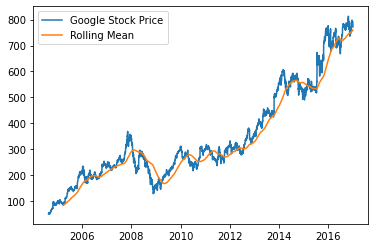

In [122]:
%matplotlib inline

# Importing matplotlib into Python
import matplotlib.pyplot as plt

# Plotting the Google stock data
plt.plot(all_stocks['Google'])

# Plotting the rolling mean ontop of our Google stock data
plt.plot(rollingMean_Google)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()

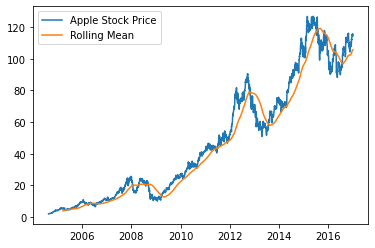

In [171]:
# Plotting the Apple stock data
plt.plot(all_stocks['Apple'])

# Plotting the rolling mean ontop of our Apple stock data
plt.plot(rollingMean_Apple)
plt.legend(['Apple Stock Price', 'Rolling Mean'])
plt.show()

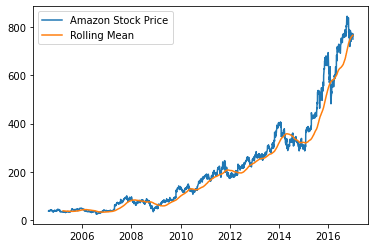

In [172]:
# Plotting the Amazon stock data
plt.plot(all_stocks['Amazon'])

# Plotting the rolling mean ontop of our Amazon stock data
plt.plot(rollingMean_Amazon)
plt.legend(['Amazon Stock Price', 'Rolling Mean'])
plt.show()